# User Story 3
- User utilizes the CurrentExp class to initialize a whole experiment as an object
- User fills out the Blueprint with the PARAMETERS and deliver it to the class.
- Users algorithm choice is MR-Hydra. 
- The algorithm is applied on the datasets Beef.
- Lastly, the run_single_pipeline() function is executed to run the a whole experiment as a one liner

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import warnings
import time
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from src.classifierWrapper import BakeoffClassifier
from src.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.apply_dca import apply_label_errors, percentage_to_instance_converter
from src.utils import load_and_expand_yaml, get_frames_and_names
from src.visualizations import visualize_acc_decr, visualize_trace_M, visualize_acc_decr_multiple
from src.current_experiment import Experiment


[2025-06-02 13:13:53] INFO - Custom-named logger active.
[2025-06-02 13:13:53] INFO - Custom-named logger active.


In [3]:
# Example usage
import copy
configuration = load_and_expand_yaml("experiment.yaml")
configuration = [copy.deepcopy(cfg) for cfg in configuration]  # Important if Configs are mutated!
configuration_2 = load_and_expand_yaml("experiment_2.yaml")

# load an explicit config and initialize the experiment
experiment = Experiment(config=configuration[11], base_path="112UCRFolds", results_root="simulation_results")

[2025-06-02 13:13:54] INFO - Loading and expanding YAML configuration from: experiment.yaml
[2025-06-02 13:13:54] INFO - YAML configuration expanded into 18 configurations
[2025-06-02 13:13:54] INFO - Loading and expanding YAML configuration from: experiment_2.yaml
[2025-06-02 13:13:54] INFO - YAML configuration expanded into 30 configurations
[2025-06-02 13:13:54] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-06-02 13:13:54] INFO - Initializing Exp with dataset: Beef, classifier: Weasel-D, strategy: LabelErrors
[2025-06-02 13:13:54] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 1, 'start': 0, 'stop': 90, 'step': 2}


X_train             : (30, 1, 470)
y_train             : (30,)
X_test              : (30, 1, 470)
y_test              : (30,)
X_train_small       : (30, 1, 470)
y_train_small       : (30,)
X_test_small        : (30, 1, 470)
y_test_small        : (30,)


[2025-06-02 13:13:57] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0


X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (625, 1, 128)
y_test_small        : (625,)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
[2025-06-02 13:13:58] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: MR-Hydra, strategy: LabelErrors
[2025-06-02 13:13:58] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}


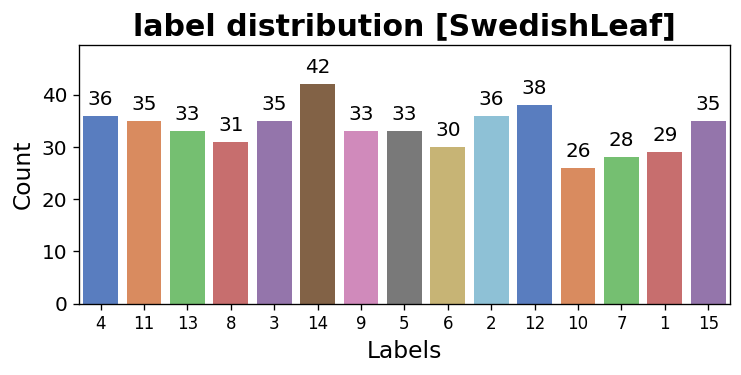

In [4]:
experiment_ = Experiment(config = configuration_2[0], base_path="112UCRFolds", results_root="simulation_results")
experiment_.dataset_overview()

In [5]:
current_exp = Experiment(config=configuration_2[6], base_path="112UCRFolds", results_root="simulation_results")
current_exp.dataset["y_train_small"]

[2025-06-02 13:14:03] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-06-02 13:14:03] INFO - Initializing Exp with dataset: Adiac, classifier: MR-Hydra, strategy: LabelErrors
[2025-06-02 13:14:03] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}


X_train             : (390, 1, 176)
y_train             : (390,)
X_test              : (391, 1, 176)
y_test              : (391,)
X_train_small       : (390, 1, 176)
y_train_small       : (390,)
X_test_small        : (391, 1, 176)
y_test_small        : (391,)


array(['22', '28', '21', '15', '2', '18', '21', '36', '11', '21', '29',
       '26', '1', '9', '17', '7', '36', '25', '11', '10', '25', '14', '3',
       '4', '36', '4', '4', '12', '23', '23', '6', '22', '8', '25', '21',
       '34', '33', '28', '1', '24', '2', '37', '32', '37', '12', '17',
       '6', '11', '4', '29', '20', '2', '27', '17', '20', '32', '25',
       '30', '31', '34', '16', '32', '28', '23', '15', '20', '24', '11',
       '35', '36', '26', '12', '18', '28', '2', '14', '7', '28', '34',
       '27', '31', '31', '35', '9', '19', '36', '12', '10', '10', '7',
       '14', '15', '10', '15', '6', '4', '32', '17', '23', '33', '19',
       '33', '18', '22', '34', '9', '10', '15', '32', '30', '10', '14',
       '1', '27', '16', '36', '24', '22', '32', '15', '2', '4', '26',
       '27', '12', '16', '28', '24', '23', '37', '13', '4', '8', '14',
       '31', '24', '29', '27', '35', '6', '2', '34', '1', '32', '6', '26',
       '33', '21', '4', '11', '8', '30', '7', '17', '20', '16', 

In [8]:
experimental_dict = {}
my_config = configuration_2[6:8]

for i_, exp_conf in enumerate(my_config):
    current_exp = Experiment(config=exp_conf, base_path="112UCRFolds", results_root="simulation_results")
    exp_name = "experiment_"+str(i_)
    current_exp.run_experiment()
    experimental_dict[exp_name]=[exp_conf, current_exp]

[2025-06-02 14:16:09] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-06-02 14:16:09] INFO - Initializing Exp with dataset: Adiac, classifier: MR-Hydra, strategy: LabelErrors
[2025-06-02 14:16:09] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-02 14:16:09] INFO - Run Experiment
[2025-06-02 14:16:09] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-02 14:16:09] INFO - requested_instance_step = 19.5 will be transformed into 20
[2025-06-02 14:16:09] INFO - requested_percentage_step = 5 % || transformed into 5.1282 %
[2025-06-02 14:16:09] INFO - label_names: ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36'
 '37' '4' '5' '6' '7' '8' '9']
[2025-06-02 14:16:09] INFO - Current Label Error Strategy: DEFAULT: l

X_train             : (390, 1, 176)
y_train             : (390,)
X_test              : (391, 1, 176)
y_test              : (391,)
X_train_small       : (390, 1, 176)
y_train_small       : (390,)
X_test_small        : (391, 1, 176)
y_test_small        : (391,)
X_train             : (390, 1, 176)
y_train             : (390,)
X_test              : (391, 1, 176)
y_test              : (391,)
X_train_small       : (390, 1, 176)
y_train_small       : (390,)
X_test_small        : (391, 1, 176)
y_test_small        : (391,)
results are not present with the current experiment parameters
There is [1] no matching labelerror Version and [2] no matching randomSeed or [3] no experiment at all
error_perc_incr:  0.002564


Classifier: BakeoffClassifier


[2025-06-02 14:16:11] INFO - ------------------------Train time=1.36s, Eval Time=0.17s
[2025-06-02 14:16:11] INFO - current iteration: 0   current LE_step: 0 error_relative: 0
[2025-06-02 14:16:11] INFO - changed label 32 to 1 at index 61 of the data
[2025-06-02 14:16:11] INFO - changed label 12 to 13 at index 71 of the data
[2025-06-02 14:16:11] INFO - changed label 28 to 12 at index 329 of the data
[2025-06-02 14:16:11] INFO - changed label 8 to 18 at index 150 of the data
[2025-06-02 14:16:11] INFO - changed label 12 to 28 at index 213 of the data
[2025-06-02 14:16:11] INFO - changed label 7 to 29 at index 89 of the data
[2025-06-02 14:16:11] INFO - changed label 14 to 31 at index 90 of the data
[2025-06-02 14:16:11] INFO - changed label 3 to 15 at index 277 of the data
[2025-06-02 14:16:11] INFO - changed label 13 to 32 at index 161 of the data
[2025-06-02 14:16:11] INFO - changed label 21 to 32 at index 9 of the data
[2025-06-02 14:16:11] INFO - changed label 3 to 20 at index 345 


Algorithm                         Accuracy
Quant                             0.8261
error_rel:  0
error_rel after increment:  0.002564
error_rel:  0.002564
error_rel after increment:  0.005128
error_rel:  0.005128
error_rel after increment:  0.007691999999999999
error_rel:  0.007692
error_rel after increment:  0.010256
error_rel:  0.010256
error_rel after increment:  0.01282
error_rel:  0.01282
error_rel after increment:  0.015384
error_rel:  0.015384
error_rel after increment:  0.017948
error_rel:  0.017948
error_rel after increment:  0.020512
error_rel:  0.020512
error_rel after increment:  0.023076
error_rel:  0.023076
error_rel after increment:  0.02564
error_rel:  0.02564
error_rel after increment:  0.028204
error_rel:  0.028204
error_rel after increment:  0.030768
error_rel:  0.030768
error_rel after increment:  0.033332
error_rel:  0.033332
error_rel after increment:  0.035896
error_rel:  0.035896
error_rel after increment:  0.038459999999999994
error_rel:  0.03846
error_rel af

[2025-06-02 14:16:13] INFO - ------------------------Train time=1.42s, Eval Time=0.18s
[2025-06-02 14:16:13] INFO - current iteration: 1   current LE_step: 20 error_relative: 0.05128
[2025-06-02 14:16:13] INFO - changed label 15 to 25 at index 93 of the data
[2025-06-02 14:16:13] INFO - changed label 5 to 14 at index 275 of the data
[2025-06-02 14:16:13] INFO - changed label 10 to 24 at index 256 of the data
[2025-06-02 14:16:13] INFO - changed label 13 to 1 at index 339 of the data
[2025-06-02 14:16:13] INFO - changed label 5 to 26 at index 187 of the data
[2025-06-02 14:16:13] INFO - changed label 17 to 9 at index 45 of the data
[2025-06-02 14:16:13] INFO - changed label 5 to 31 at index 159 of the data
[2025-06-02 14:16:13] INFO - changed label 33 to 37 at index 297 of the data
[2025-06-02 14:16:13] INFO - changed label 15 to 28 at index 91 of the data
[2025-06-02 14:16:13] INFO - changed label 20 to 28 at index 50 of the data
[2025-06-02 14:16:13] INFO - changed label 12 to 23 at i


Algorithm                         Accuracy
Quant                             0.8338
error_rel:  0.05128
error_rel after increment:  0.053843999999999996
error_rel:  0.053844
error_rel after increment:  0.056408
error_rel:  0.056408
error_rel after increment:  0.058972
error_rel:  0.058972
error_rel after increment:  0.061535999999999993
error_rel:  0.061536
error_rel after increment:  0.0641
error_rel:  0.0641
error_rel after increment:  0.066664
error_rel:  0.066664
error_rel after increment:  0.069228
error_rel:  0.069228
error_rel after increment:  0.071792
error_rel:  0.071792
error_rel after increment:  0.07435599999999999
error_rel:  0.074356
error_rel after increment:  0.07692
error_rel:  0.07692
error_rel after increment:  0.079484
error_rel:  0.079484
error_rel after increment:  0.082048
error_rel:  0.082048
error_rel after increment:  0.08461199999999999
error_rel:  0.084612
error_rel after increment:  0.087176
error_rel:  0.087176
error_rel after increment:  0.08974
error_r

[2025-06-02 14:16:14] INFO - ------------------------Train time=1.55s, Eval Time=0.18s
[2025-06-02 14:16:14] INFO - current iteration: 2   current LE_step: 40 error_relative: 0.10256
[2025-06-02 14:16:14] INFO - changed label 4 to 35 at index 121 of the data
[2025-06-02 14:16:14] INFO - changed label 35 to 8 at index 138 of the data
[2025-06-02 14:16:14] INFO - changed label 15 to 1 at index 238 of the data
[2025-06-02 14:16:14] INFO - changed label 33 to 1 at index 360 of the data
[2025-06-02 14:16:14] INFO - changed label 29 to 14 at index 267 of the data
[2025-06-02 14:16:14] INFO - changed label 16 to 26 at index 60 of the data
[2025-06-02 14:16:14] INFO - changed label 2 to 24 at index 140 of the data
[2025-06-02 14:16:14] INFO - changed label 25 to 13 at index 242 of the data
[2025-06-02 14:16:14] INFO - changed label 1 to 5 at index 270 of the data
[2025-06-02 14:16:14] INFO - changed label 34 to 10 at index 217 of the data
[2025-06-02 14:16:14] INFO - changed label 22 to 10 at 


Algorithm                         Accuracy
Quant                             0.7980
error_rel:  0.10256
error_rel after increment:  0.105124
error_rel:  0.105124
error_rel after increment:  0.10768799999999999
error_rel:  0.107688
error_rel after increment:  0.110252
error_rel:  0.110252
error_rel after increment:  0.112816
error_rel:  0.112816
error_rel after increment:  0.11538
error_rel:  0.11538
error_rel after increment:  0.117944
error_rel:  0.117944
error_rel after increment:  0.12050799999999999
error_rel:  0.120508
error_rel after increment:  0.123072
error_rel:  0.123072
error_rel after increment:  0.125636
error_rel:  0.125636
error_rel after increment:  0.1282
error_rel:  0.1282
error_rel after increment:  0.13076400000000002
error_rel:  0.130764
error_rel after increment:  0.133328
error_rel:  0.133328
error_rel after increment:  0.135892
error_rel:  0.135892
error_rel after increment:  0.13845600000000002
error_rel:  0.138456
error_rel after increment:  0.14102
error_rel

[2025-06-02 14:16:16] INFO - ------------------------Train time=1.61s, Eval Time=0.18s
[2025-06-02 14:16:16] INFO - current iteration: 3   current LE_step: 60 error_relative: 0.15384
[2025-06-02 14:16:16] INFO - changed label 24 to 2 at index 200 of the data
[2025-06-02 14:16:16] INFO - changed label 17 to 13 at index 210 of the data
[2025-06-02 14:16:16] INFO - changed label 21 to 15 at index 6 of the data
[2025-06-02 14:16:16] INFO - changed label 28 to 13 at index 77 of the data
[2025-06-02 14:16:16] INFO - changed label 34 to 12 at index 78 of the data
[2025-06-02 14:16:16] INFO - changed label 13 to 21 at index 350 of the data
[2025-06-02 14:16:16] INFO - changed label 28 to 22 at index 285 of the data
[2025-06-02 14:16:16] INFO - changed label 19 to 24 at index 374 of the data
[2025-06-02 14:16:16] INFO - changed label 3 to 28 at index 260 of the data
[2025-06-02 14:16:16] INFO - changed label 16 to 9 at index 114 of the data
[2025-06-02 14:16:16] INFO - changed label 9 to 30 at 


Algorithm                         Accuracy
Quant                             0.7545
error_rel:  0.15384
error_rel after increment:  0.15640400000000002
error_rel:  0.156404
error_rel after increment:  0.158968
error_rel:  0.158968
error_rel after increment:  0.161532
error_rel:  0.161532
error_rel after increment:  0.16409600000000002
error_rel:  0.164096
error_rel after increment:  0.16666
error_rel:  0.16666
error_rel after increment:  0.169224
error_rel:  0.169224
error_rel after increment:  0.17178800000000002
error_rel:  0.171788
error_rel after increment:  0.174352
error_rel:  0.174352
error_rel after increment:  0.17691600000000002
error_rel:  0.176916
error_rel after increment:  0.17948
error_rel:  0.17948
error_rel after increment:  0.182044
error_rel:  0.182044
error_rel after increment:  0.18460800000000002
error_rel:  0.184608
error_rel after increment:  0.187172
error_rel:  0.187172
error_rel after increment:  0.18973600000000002
error_rel:  0.189736
error_rel after incre

[2025-06-02 14:16:18] INFO - ------------------------Train time=1.71s, Eval Time=0.18s
[2025-06-02 14:16:18] INFO - current iteration: 4   current LE_step: 80 error_relative: 0.20512
[2025-06-02 14:16:18] INFO - changed label 28 to 1 at index 271 of the data
[2025-06-02 14:16:18] INFO - changed label 20 to 8 at index 54 of the data
[2025-06-02 14:16:18] INFO - changed label 12 to 37 at index 27 of the data
[2025-06-02 14:16:18] INFO - changed label 12 to 13 at index 166 of the data
[2025-06-02 14:16:18] INFO - changed label 4 to 8 at index 131 of the data
[2025-06-02 14:16:18] INFO - changed label 36 to 21 at index 24 of the data
[2025-06-02 14:16:18] INFO - changed label 33 to 29 at index 375 of the data
[2025-06-02 14:16:18] INFO - changed label 21 to 18 at index 34 of the data
[2025-06-02 14:16:18] INFO - changed label 11 to 1 at index 157 of the data
[2025-06-02 14:16:18] INFO - changed label 34 to 19 at index 59 of the data
[2025-06-02 14:16:18] INFO - changed label 9 to 30 at ind


Algorithm                         Accuracy
Quant                             0.7263
error_rel:  0.20512
error_rel after increment:  0.207684
error_rel:  0.207684
error_rel after increment:  0.21024800000000002
error_rel:  0.210248
error_rel after increment:  0.212812
error_rel:  0.212812
error_rel after increment:  0.215376
error_rel:  0.215376
error_rel after increment:  0.21794000000000002
error_rel:  0.21794
error_rel after increment:  0.220504
error_rel:  0.220504
error_rel after increment:  0.22306800000000002
error_rel:  0.223068
error_rel after increment:  0.225632
error_rel:  0.225632
error_rel after increment:  0.228196
error_rel:  0.228196
error_rel after increment:  0.23076000000000002
error_rel:  0.23076
error_rel after increment:  0.233324
error_rel:  0.233324
error_rel after increment:  0.23588800000000001
error_rel:  0.235888
error_rel after increment:  0.238452
error_rel:  0.238452
error_rel after increment:  0.241016
error_rel:  0.241016
error_rel after increment:  0.

[2025-06-02 14:16:20] INFO - ------------------------Train time=1.72s, Eval Time=0.16s
[2025-06-02 14:16:20] INFO - current iteration: 5   current LE_step: 100 error_relative: 0.2564
[2025-06-02 14:16:20] INFO - changed label 4 to 34 at index 327 of the data
[2025-06-02 14:16:20] INFO - changed label 37 to 22 at index 361 of the data
[2025-06-02 14:16:20] INFO - changed label 11 to 10 at index 243 of the data
[2025-06-02 14:16:20] INFO - changed label 11 to 2 at index 47 of the data
[2025-06-02 14:16:20] INFO - changed label 30 to 3 at index 303 of the data
[2025-06-02 14:16:20] INFO - changed label 25 to 2 at index 20 of the data
[2025-06-02 14:16:20] INFO - changed label 34 to 11 at index 377 of the data
[2025-06-02 14:16:20] INFO - changed label 36 to 24 at index 7 of the data
[2025-06-02 14:16:20] INFO - changed label 15 to 6 at index 244 of the data
[2025-06-02 14:16:20] INFO - changed label 26 to 1 at index 145 of the data
[2025-06-02 14:16:20] INFO - changed label 32 to 27 at in


Algorithm                         Accuracy
Quant                             0.7033
error_rel:  0.2564
error_rel after increment:  0.258964
error_rel:  0.258964
error_rel after increment:  0.26152800000000004
error_rel:  0.261528
error_rel after increment:  0.264092
error_rel:  0.264092
error_rel after increment:  0.266656
error_rel:  0.266656
error_rel after increment:  0.26922
error_rel:  0.26922
error_rel after increment:  0.271784
error_rel:  0.271784
error_rel after increment:  0.27434800000000004
error_rel:  0.274348
error_rel after increment:  0.276912
error_rel:  0.276912
error_rel after increment:  0.279476
error_rel:  0.279476
error_rel after increment:  0.28204
error_rel:  0.28204
error_rel after increment:  0.284604
error_rel:  0.284604
error_rel after increment:  0.28716800000000003
error_rel:  0.287168
error_rel after increment:  0.289732
error_rel:  0.289732
error_rel after increment:  0.292296
error_rel:  0.292296
error_rel after increment:  0.29486
error_rel:  0.29486

[2025-06-02 14:16:22] INFO - ------------------------Train time=1.82s, Eval Time=0.18s
[2025-06-02 14:16:22] INFO - current iteration: 6   current LE_step: 120 error_relative: 0.30768
[2025-06-02 14:16:22] INFO - changed label 6 to 27 at index 249 of the data
[2025-06-02 14:16:22] INFO - changed label 31 to 5 at index 343 of the data
[2025-06-02 14:16:22] INFO - changed label 14 to 18 at index 75 of the data
[2025-06-02 14:16:22] INFO - changed label 24 to 34 at index 170 of the data
[2025-06-02 14:16:22] INFO - changed label 29 to 11 at index 353 of the data
[2025-06-02 14:16:22] INFO - changed label 31 to 12 at index 349 of the data
[2025-06-02 14:16:22] INFO - changed label 31 to 22 at index 58 of the data
[2025-06-02 14:16:22] INFO - changed label 11 to 6 at index 67 of the data
[2025-06-02 14:16:22] INFO - changed label 26 to 13 at index 185 of the data
[2025-06-02 14:16:22] INFO - changed label 36 to 12 at index 69 of the data
[2025-06-02 14:16:22] INFO - changed label 32 to 2 at


Algorithm                         Accuracy
Quant                             0.6777
error_rel:  0.30768
error_rel after increment:  0.310244
error_rel:  0.310244
error_rel after increment:  0.31280800000000003
error_rel:  0.312808
error_rel after increment:  0.315372
error_rel:  0.315372
error_rel after increment:  0.317936
error_rel:  0.317936
error_rel after increment:  0.3205
error_rel:  0.3205
error_rel after increment:  0.323064
error_rel:  0.323064
error_rel after increment:  0.32562800000000003
error_rel:  0.325628
error_rel after increment:  0.328192
error_rel:  0.328192
error_rel after increment:  0.330756
error_rel:  0.330756
error_rel after increment:  0.33332
error_rel:  0.33332
error_rel after increment:  0.335884
error_rel:  0.335884
error_rel after increment:  0.338448
error_rel:  0.338448
error_rel after increment:  0.34101200000000004
error_rel:  0.341012
error_rel after increment:  0.343576
error_rel:  0.343576
error_rel after increment:  0.34614
error_rel:  0.34614


[2025-06-02 14:16:24] INFO - ------------------------Train time=1.87s, Eval Time=0.17s
[2025-06-02 14:16:24] INFO - current iteration: 7   current LE_step: 140 error_relative: 0.35896
[2025-06-02 14:16:24] INFO - changed label 20 to 28 at index 154 of the data
[2025-06-02 14:16:24] INFO - changed label 29 to 7 at index 257 of the data
[2025-06-02 14:16:24] INFO - changed label 4 to 6 at index 148 of the data
[2025-06-02 14:16:24] INFO - changed label 6 to 15 at index 182 of the data
[2025-06-02 14:16:24] INFO - changed label 36 to 29 at index 290 of the data
[2025-06-02 14:16:24] INFO - changed label 30 to 5 at index 201 of the data
[2025-06-02 14:16:24] INFO - changed label 14 to 22 at index 111 of the data
[2025-06-02 14:16:24] INFO - changed label 32 to 16 at index 108 of the data
[2025-06-02 14:16:24] INFO - changed label 33 to 31 at index 386 of the data
[2025-06-02 14:16:24] INFO - changed label 33 to 23 at index 36 of the data
[2025-06-02 14:16:24] INFO - changed label 24 to 27 


Algorithm                         Accuracy
Quant                             0.6419
error_rel:  0.35896
error_rel after increment:  0.361524
error_rel:  0.361524
error_rel after increment:  0.364088
error_rel:  0.364088
error_rel after increment:  0.36665200000000003
error_rel:  0.366652
error_rel after increment:  0.369216
error_rel:  0.369216
error_rel after increment:  0.37178
error_rel:  0.37178
error_rel after increment:  0.374344
error_rel:  0.374344
error_rel after increment:  0.376908
error_rel:  0.376908
error_rel after increment:  0.37947200000000003
error_rel:  0.379472
error_rel after increment:  0.382036
error_rel:  0.382036
error_rel after increment:  0.3846
error_rel:  0.3846
error_rel after increment:  0.387164
error_rel:  0.387164
error_rel after increment:  0.389728
error_rel:  0.389728
error_rel after increment:  0.39229200000000003
error_rel:  0.392292
error_rel after increment:  0.394856
error_rel:  0.394856
error_rel after increment:  0.39742
error_rel:  0.39742


[2025-06-02 14:16:26] INFO - ------------------------Train time=1.92s, Eval Time=0.16s
[2025-06-02 14:16:26] INFO - current iteration: 8   current LE_step: 160 error_relative: 0.41024
[2025-06-02 14:16:26] INFO - changed label 21 to 12 at index 198 of the data
[2025-06-02 14:16:26] INFO - changed label 23 to 20 at index 245 of the data
[2025-06-02 14:16:26] INFO - changed label 24 to 9 at index 317 of the data
[2025-06-02 14:16:26] INFO - changed label 30 to 3 at index 358 of the data
[2025-06-02 14:16:26] INFO - changed label 19 to 14 at index 193 of the data
[2025-06-02 14:16:26] INFO - changed label 16 to 31 at index 125 of the data
[2025-06-02 14:16:26] INFO - changed label 28 to 6 at index 73 of the data
[2025-06-02 14:16:26] INFO - changed label 26 to 2 at index 289 of the data
[2025-06-02 14:16:26] INFO - changed label 25 to 29 at index 384 of the data
[2025-06-02 14:16:26] INFO - changed label 32 to 19 at index 324 of the data
[2025-06-02 14:16:26] INFO - changed label 37 to 35


Algorithm                         Accuracy
Quant                             0.6343
error_rel:  0.41024
error_rel after increment:  0.412804
error_rel:  0.412804
error_rel after increment:  0.415368
error_rel:  0.415368
error_rel after increment:  0.417932
error_rel:  0.417932
error_rel after increment:  0.42049600000000004
error_rel:  0.420496
error_rel after increment:  0.42306
error_rel:  0.42306
error_rel after increment:  0.425624
error_rel:  0.425624
error_rel after increment:  0.428188
error_rel:  0.428188
error_rel after increment:  0.430752
error_rel:  0.430752
error_rel after increment:  0.43331600000000003
error_rel:  0.433316
error_rel after increment:  0.43588
error_rel:  0.43588
error_rel after increment:  0.438444
error_rel:  0.438444
error_rel after increment:  0.441008
error_rel:  0.441008
error_rel after increment:  0.443572
error_rel:  0.443572
error_rel after increment:  0.44613600000000003
error_rel:  0.446136
error_rel after increment:  0.4487
error_rel:  0.4487


[2025-06-02 14:16:28] INFO - ------------------------Train time=1.92s, Eval Time=0.17s
[2025-06-02 14:16:28] INFO - current iteration: 9   current LE_step: 180 error_relative: 0.46152
[2025-06-02 14:16:28] INFO - changed label 18 to 19 at index 72 of the data
[2025-06-02 14:16:28] INFO - changed label 26 to 18 at index 253 of the data
[2025-06-02 14:16:28] INFO - changed label 32 to 30 at index 55 of the data
[2025-06-02 14:16:28] INFO - changed label 20 to 12 at index 335 of the data
[2025-06-02 14:16:28] INFO - changed label 35 to 33 at index 366 of the data
[2025-06-02 14:16:28] INFO - changed label 21 to 12 at index 147 of the data
[2025-06-02 14:16:28] INFO - changed label 29 to 5 at index 49 of the data
[2025-06-02 14:16:28] INFO - changed label 30 to 18 at index 299 of the data
[2025-06-02 14:16:28] INFO - changed label 33 to 19 at index 212 of the data
[2025-06-02 14:16:28] INFO - changed label 27 to 35 at index 52 of the data
[2025-06-02 14:16:28] INFO - changed label 17 to 16


Algorithm                         Accuracy
Quant                             0.5729
error_rel:  0.46152
error_rel after increment:  0.464084
error_rel:  0.464084
error_rel after increment:  0.466648
error_rel:  0.466648
error_rel after increment:  0.469212
error_rel:  0.469212
error_rel after increment:  0.47177600000000003
error_rel:  0.471776
error_rel after increment:  0.47434
error_rel:  0.47434
error_rel after increment:  0.476904
error_rel:  0.476904
error_rel after increment:  0.479468
error_rel:  0.479468
error_rel after increment:  0.482032
error_rel:  0.482032
error_rel after increment:  0.484596
error_rel:  0.484596
error_rel after increment:  0.48716000000000004
error_rel:  0.48716
error_rel after increment:  0.489724
error_rel:  0.489724
error_rel after increment:  0.492288
error_rel:  0.492288
error_rel after increment:  0.494852
error_rel:  0.494852
error_rel after increment:  0.497416
error_rel:  0.497416
error_rel after increment:  0.49998000000000004
error_rel:  0.49

[2025-06-02 14:16:30] INFO - ------------------------Train time=2.01s, Eval Time=0.18s
[2025-06-02 14:16:30] INFO - current iteration: 10   current LE_step: 200 error_relative: 0.5128
[2025-06-02 14:16:30] INFO - changed label 1 to 8 at index 112 of the data
[2025-06-02 14:16:30] INFO - changed label 28 to 14 at index 169 of the data
[2025-06-02 14:16:30] INFO - changed label 11 to 25 at index 18 of the data
[2025-06-02 14:16:30] INFO - changed label 15 to 18 at index 119 of the data
[2025-06-02 14:16:30] INFO - changed label 11 to 10 at index 316 of the data
[2025-06-02 14:16:30] INFO - changed label 35 to 25 at index 240 of the data
[2025-06-02 14:16:30] INFO - changed label 12 to 9 at index 163 of the data
[2025-06-02 14:16:30] INFO - changed label 20 to 35 at index 247 of the data
[2025-06-02 14:16:30] INFO - changed label 16 to 33 at index 266 of the data
[2025-06-02 14:16:30] INFO - changed label 20 to 12 at index 174 of the data
[2025-06-02 14:16:30] INFO - changed label 4 to 9 


Algorithm                         Accuracy
Quant                             0.5217
error_rel:  0.5128
error_rel after increment:  0.515364
error_rel:  0.515364
error_rel after increment:  0.517928
error_rel:  0.517928
error_rel after increment:  0.5204920000000001
error_rel:  0.520492
error_rel after increment:  0.523056
error_rel:  0.523056
error_rel after increment:  0.52562
error_rel:  0.52562
error_rel after increment:  0.528184
error_rel:  0.528184
error_rel after increment:  0.530748
error_rel:  0.530748
error_rel after increment:  0.533312
error_rel:  0.533312
error_rel after increment:  0.535876
error_rel:  0.535876
error_rel after increment:  0.53844
error_rel:  0.53844
error_rel after increment:  0.541004
error_rel:  0.541004
error_rel after increment:  0.543568
error_rel:  0.543568
error_rel after increment:  0.5461320000000001
error_rel:  0.546132
error_rel after increment:  0.548696
error_rel:  0.548696
error_rel after increment:  0.55126
error_rel:  0.55126
error_rel af

[2025-06-02 14:16:33] INFO - ------------------------Train time=2.06s, Eval Time=0.17s
[2025-06-02 14:16:33] INFO - current iteration: 11   current LE_step: 220 error_relative: 0.56408
[2025-06-02 14:16:33] INFO - changed label 1 to 21 at index 272 of the data
[2025-06-02 14:16:33] INFO - changed label 20 to 11 at index 192 of the data
[2025-06-02 14:16:33] INFO - changed label 6 to 34 at index 284 of the data
[2025-06-02 14:16:33] WARNING - Class 20 is now empty and will be removed from le_params!
[2025-06-02 14:16:33] INFO - changed label 20 to 3 at index 205 of the data
[2025-06-02 14:16:33] INFO - changed label 18 to 20 at index 320 of the data
[2025-06-02 14:16:33] INFO - changed label 7 to 3 at index 76 of the data
[2025-06-02 14:16:33] INFO - changed label 4 to 37 at index 25 of the data
[2025-06-02 14:16:33] INFO - changed label 34 to 25 at index 104 of the data
[2025-06-02 14:16:33] WARNING - Class 21 is now empty and will be removed from le_params!
[2025-06-02 14:16:33] INFO 


Algorithm                         Accuracy
Quant                             0.4655
error_rel:  0.56408
error_rel after increment:  0.566644
error_rel:  0.566644
error_rel after increment:  0.569208
error_rel:  0.569208
error_rel after increment:  0.5717720000000001
error_rel:  0.571772
error_rel after increment:  0.574336
error_rel:  0.574336
error_rel after increment:  0.5769
error_rel:  0.5769
error_rel after increment:  0.579464
error_rel:  0.579464
error_rel after increment:  0.582028
error_rel:  0.582028
error_rel after increment:  0.584592
error_rel:  0.584592
error_rel after increment:  0.587156
error_rel:  0.587156
error_rel after increment:  0.58972
error_rel:  0.58972
error_rel after increment:  0.592284
error_rel:  0.592284
error_rel after increment:  0.594848
error_rel:  0.594848
error_rel after increment:  0.597412
error_rel:  0.597412
error_rel after increment:  0.5999760000000001
error_rel:  0.599976
error_rel after increment:  0.60254
error_rel:  0.60254
error_rel aft

[2025-06-02 14:16:35] INFO - ------------------------Train time=2.13s, Eval Time=0.18s
[2025-06-02 14:16:35] INFO - current iteration: 12   current LE_step: 240 error_relative: 0.61536
[2025-06-02 14:16:35] INFO - changed label 29 to 36 at index 202 of the data
[2025-06-02 14:16:35] INFO - changed label 19 to 26 at index 364 of the data
[2025-06-02 14:16:35] INFO - changed label 24 to 1 at index 351 of the data
[2025-06-02 14:16:35] INFO - changed label 16 to 30 at index 378 of the data
[2025-06-02 14:16:35] INFO - changed label 7 to 24 at index 152 of the data
[2025-06-02 14:16:35] INFO - changed label 6 to 37 at index 144 of the data
[2025-06-02 14:16:35] INFO - changed label 36 to 31 at index 228 of the data
[2025-06-02 14:16:35] WARNING - Class 23 is now empty and will be removed from le_params!
[2025-06-02 14:16:35] INFO - changed label 23 to 12 at index 98 of the data
[2025-06-02 14:16:35] INFO - changed label 16 to 18 at index 209 of the data
[2025-06-02 14:16:35] INFO - changed


Algorithm                         Accuracy
Quant                             0.4169
error_rel:  0.61536
error_rel after increment:  0.617924
error_rel:  0.617924
error_rel after increment:  0.620488
error_rel:  0.620488
error_rel after increment:  0.623052
error_rel:  0.623052
error_rel after increment:  0.6256160000000001
error_rel:  0.625616
error_rel after increment:  0.62818
error_rel:  0.62818
error_rel after increment:  0.630744
error_rel:  0.630744
error_rel after increment:  0.633308
error_rel:  0.633308
error_rel after increment:  0.635872
error_rel:  0.635872
error_rel after increment:  0.638436
error_rel:  0.638436
error_rel after increment:  0.641
error_rel:  0.641
error_rel after increment:  0.643564
error_rel:  0.643564
error_rel after increment:  0.646128
error_rel:  0.646128
error_rel after increment:  0.648692
error_rel:  0.648692
error_rel after increment:  0.6512560000000001
error_rel:  0.651256
error_rel after increment:  0.65382
error_rel:  0.65382
error_rel after

[2025-06-02 14:16:37] INFO - ------------------------Train time=2.08s, Eval Time=0.17s
[2025-06-02 14:16:37] INFO - current iteration: 13   current LE_step: 260 error_relative: 0.66664
[2025-06-02 14:16:37] INFO - changed label 32 to 2 at index 308 of the data
[2025-06-02 14:16:37] INFO - changed label 37 to 35 at index 225 of the data
[2025-06-02 14:16:37] INFO - changed label 37 to 32 at index 167 of the data
[2025-06-02 14:16:37] INFO - changed label 36 to 6 at index 347 of the data
[2025-06-02 14:16:37] INFO - changed label 33 to 22 at index 101 of the data
[2025-06-02 14:16:37] INFO - changed label 17 to 30 at index 254 of the data
[2025-06-02 14:16:37] INFO - changed label 22 to 36 at index 0 of the data
[2025-06-02 14:16:37] INFO - changed label 22 to 29 at index 117 of the data
[2025-06-02 14:16:37] INFO - changed label 29 to 26 at index 281 of the data
[2025-06-02 14:16:37] INFO - changed label 37 to 13 at index 206 of the data
[2025-06-02 14:16:37] INFO - changed label 14 to 


Algorithm                         Accuracy
Quant                             0.3657
error_rel:  0.66664
error_rel after increment:  0.669204
error_rel:  0.669204
error_rel after increment:  0.671768
error_rel:  0.671768
error_rel after increment:  0.674332
error_rel:  0.674332
error_rel after increment:  0.676896
error_rel:  0.676896
error_rel after increment:  0.6794600000000001
error_rel:  0.67946
error_rel after increment:  0.682024
error_rel:  0.682024
error_rel after increment:  0.684588
error_rel:  0.684588
error_rel after increment:  0.687152
error_rel:  0.687152
error_rel after increment:  0.689716
error_rel:  0.689716
error_rel after increment:  0.69228
error_rel:  0.69228
error_rel after increment:  0.694844
error_rel:  0.694844
error_rel after increment:  0.697408
error_rel:  0.697408
error_rel after increment:  0.699972
error_rel:  0.699972
error_rel after increment:  0.702536
error_rel:  0.702536
error_rel after increment:  0.7051000000000001
error_rel:  0.7051
error_rel 

[2025-06-02 14:16:40] INFO - ------------------------Train time=2.17s, Eval Time=0.17s
[2025-06-02 14:16:40] INFO - current iteration: 14   current LE_step: 280 error_relative: 0.71792
[2025-06-02 14:16:40] INFO - changed label 14 to 24 at index 314 of the data
[2025-06-02 14:16:40] INFO - changed label 10 to 20 at index 19 of the data
[2025-06-02 14:16:40] INFO - changed label 28 to 13 at index 37 of the data
[2025-06-02 14:16:40] WARNING - Class 9 is now empty and will be removed from le_params!
[2025-06-02 14:16:40] INFO - changed label 9 to 35 at index 83 of the data
[2025-06-02 14:16:40] INFO - changed label 1 to 34 at index 279 of the data
[2025-06-02 14:16:40] INFO - changed label 31 to 19 at index 197 of the data
[2025-06-02 14:16:40] INFO - changed label 4 to 34 at index 333 of the data
[2025-06-02 14:16:40] INFO - changed label 32 to 9 at index 143 of the data
[2025-06-02 14:16:40] INFO - changed label 35 to 26 at index 229 of the data
[2025-06-02 14:16:40] INFO - changed lab


Algorithm                         Accuracy
Quant                             0.3146
error_rel:  0.71792
error_rel after increment:  0.720484
error_rel:  0.720484
error_rel after increment:  0.723048
error_rel:  0.723048
error_rel after increment:  0.725612
error_rel:  0.725612
error_rel after increment:  0.728176
error_rel:  0.728176
error_rel after increment:  0.7307400000000001
error_rel:  0.73074
error_rel after increment:  0.733304
error_rel:  0.733304
error_rel after increment:  0.735868
error_rel:  0.735868
error_rel after increment:  0.738432
error_rel:  0.738432
error_rel after increment:  0.740996
error_rel:  0.740996
error_rel after increment:  0.74356
error_rel:  0.74356
error_rel after increment:  0.746124
error_rel:  0.746124
error_rel after increment:  0.748688
error_rel:  0.748688
error_rel after increment:  0.751252
error_rel:  0.751252
error_rel after increment:  0.753816
error_rel:  0.753816
error_rel after increment:  0.75638
error_rel:  0.75638
error_rel after incr

[2025-06-02 14:16:42] INFO - ------------------------Train time=2.17s, Eval Time=0.17s
[2025-06-02 14:16:42] INFO - current iteration: 15   current LE_step: 300 error_relative: 0.7692
[2025-06-02 14:16:42] WARNING - Class 28 is now empty and will be removed from le_params!
[2025-06-02 14:16:42] INFO - changed label 28 to 21 at index 62 of the data
[2025-06-02 14:16:42] INFO - changed label 29 to 15 at index 10 of the data
[2025-06-02 14:16:42] INFO - changed label 30 to 17 at index 273 of the data
[2025-06-02 14:16:42] WARNING - Class 37 is now empty and will be removed from le_params!
[2025-06-02 14:16:42] INFO - changed label 37 to 21 at index 129 of the data
[2025-06-02 14:16:42] INFO - changed label 14 to 17 at index 236 of the data
[2025-06-02 14:16:42] INFO - changed label 18 to 25 at index 323 of the data
[2025-06-02 14:16:42] WARNING - Class 29 is now empty and will be removed from le_params!
[2025-06-02 14:16:42] INFO - changed label 29 to 30 at index 370 of the data
[2025-06-


Algorithm                         Accuracy
Quant                             0.2864
error_rel:  0.7692
error_rel after increment:  0.771764
error_rel:  0.771764
error_rel after increment:  0.774328
error_rel:  0.774328
error_rel after increment:  0.776892
error_rel:  0.776892
error_rel after increment:  0.779456
error_rel:  0.779456
error_rel after increment:  0.78202
error_rel:  0.78202
error_rel after increment:  0.7845840000000001
error_rel:  0.784584
error_rel after increment:  0.787148
error_rel:  0.787148
error_rel after increment:  0.789712
error_rel:  0.789712
error_rel after increment:  0.792276
error_rel:  0.792276
error_rel after increment:  0.79484
error_rel:  0.79484
error_rel after increment:  0.797404
error_rel:  0.797404
error_rel after increment:  0.799968
error_rel:  0.799968
error_rel after increment:  0.802532
error_rel:  0.802532
error_rel after increment:  0.805096
error_rel:  0.805096
error_rel after increment:  0.80766
error_rel:  0.80766
error_rel after increm

[2025-06-02 14:16:44] INFO - ------------------------Train time=2.23s, Eval Time=0.17s
[2025-06-02 14:16:44] INFO - current iteration: 16   current LE_step: 320 error_relative: 0.82048
[2025-06-02 14:16:44] INFO - changed label 25 to 13 at index 311 of the data
[2025-06-02 14:16:44] INFO - changed label 1 to 31 at index 363 of the data
[2025-06-02 14:16:44] INFO - changed label 14 to 4 at index 133 of the data
[2025-06-02 14:16:44] INFO - changed label 6 to 32 at index 215 of the data
[2025-06-02 14:16:44] WARNING - Class 26 is now empty and will be removed from le_params!
[2025-06-02 14:16:44] INFO - changed label 26 to 29 at index 122 of the data
[2025-06-02 14:16:44] INFO - changed label 24 to 7 at index 135 of the data
[2025-06-02 14:16:44] INFO - changed label 24 to 31 at index 66 of the data
[2025-06-02 14:16:44] INFO - changed label 7 to 34 at index 383 of the data
[2025-06-02 14:16:44] INFO - changed label 14 to 37 at index 214 of the data
[2025-06-02 14:16:44] INFO - changed l


Algorithm                         Accuracy
Quant                             0.2174
error_rel:  0.82048
error_rel after increment:  0.823044
error_rel:  0.823044
error_rel after increment:  0.825608
error_rel:  0.825608
error_rel after increment:  0.828172
error_rel:  0.828172
error_rel after increment:  0.830736
error_rel:  0.830736
error_rel after increment:  0.8333
error_rel:  0.8333
error_rel after increment:  0.835864
error_rel:  0.835864
error_rel after increment:  0.8384280000000001
error_rel:  0.838428
error_rel after increment:  0.840992
error_rel:  0.840992
error_rel after increment:  0.843556
error_rel:  0.843556
error_rel after increment:  0.84612
error_rel:  0.84612
error_rel after increment:  0.848684
error_rel:  0.848684
error_rel after increment:  0.851248
error_rel:  0.851248
error_rel after increment:  0.853812
error_rel:  0.853812
error_rel after increment:  0.856376
error_rel:  0.856376
error_rel after increment:  0.85894
error_rel:  0.85894
error_rel after increme

[2025-06-02 14:16:47] INFO - ------------------------Train time=2.25s, Eval Time=0.16s
[2025-06-02 14:16:47] INFO - current iteration: 17   current LE_step: 340 error_relative: 0.87176
[2025-06-02 14:16:47] INFO - changed label 27 to 13 at index 352 of the data
[2025-06-02 14:16:47] INFO - changed label 8 to 24 at index 356 of the data
[2025-06-02 14:16:47] INFO - changed label 10 to 2 at index 246 of the data
[2025-06-02 14:16:47] WARNING - Class 14 is now empty and will be removed from le_params!
[2025-06-02 14:16:47] INFO - changed label 14 to 4 at index 21 of the data
[2025-06-02 14:16:47] WARNING - Class 30 is now empty and will be removed from le_params!
[2025-06-02 14:16:47] INFO - changed label 30 to 35 at index 382 of the data
[2025-06-02 14:16:47] INFO - changed label 2 to 5 at index 235 of the data
[2025-06-02 14:16:47] INFO - changed label 8 to 28 at index 305 of the data
[2025-06-02 14:16:47] INFO - changed label 27 to 15 at index 288 of the data
[2025-06-02 14:16:47] INFO


Algorithm                         Accuracy
Quant                             0.1714
error_rel:  0.87176
error_rel after increment:  0.874324
error_rel:  0.874324
error_rel after increment:  0.876888
error_rel:  0.876888
error_rel after increment:  0.879452
error_rel:  0.879452
error_rel after increment:  0.882016
error_rel:  0.882016
error_rel after increment:  0.88458
error_rel:  0.88458
error_rel after increment:  0.887144
error_rel:  0.887144
error_rel after increment:  0.889708
error_rel:  0.889708
error_rel after increment:  0.8922720000000001
error_rel:  0.892272
error_rel after increment:  0.894836
error_rel:  0.894836
error_rel after increment:  0.8974
error_rel:  0.8974
error_rel after increment:  0.899964
error_rel:  0.899964
error_rel after increment:  0.902528
error_rel:  0.902528
error_rel after increment:  0.905092
error_rel:  0.905092
error_rel after increment:  0.907656
error_rel:  0.907656
error_rel after increment:  0.91022
error_rel:  0.91022
error_rel after increme

[2025-06-02 14:16:49] INFO - ------------------------Train time=2.24s, Eval Time=0.17s
[2025-06-02 14:16:49] INFO - current iteration: 18   current LE_step: 360 error_relative: 0.92304



Algorithm                         Accuracy
Quant                             0.0997
✅ Results saved in: simulation_results/Quant/Adiac/leV1_0_0_360_20


In [9]:
experimental_dict.keys()

dict_keys(['experiment_0', 'experiment_1'])

In [10]:
experimental_dict["experiment_1"][1].df_.iloc[15:20]

,step,LE_instances,LE_relative,accuracy,y_train_history,y_pred,y_pred_prob
15,15,300,0.76920,0.286445,"[36, 14, 7, 10, 21, 10, 15, 24, 11, 32, 29, 7,...","[9, 36, 1, 25, 14, 31, 24, 2, 4, 14, 24, 14, 2...","[[0.015, 0.0, 0.005, 0.0, 0.01, 0.01, 0.005, 0..."
16,16,320,0.82048,0.217391,"[36, 14, 7, 10, 21, 10, 15, 24, 11, 32, 15, 7,...","[9, 36, 13, 8, 27, 26, 24, 2, 4, 14, 24, 14, 2...","[[0.04, 0.01, 0.005, 0.015, 0.03, 0.005, 0.0, ..."
17,17,340,0.87176,0.171355,"[36, 14, 7, 10, 21, 10, 15, 24, 11, 32, 15, 7,...","[26, 36, 9, 8, 14, 31, 24, 31, 3, 18, 24, 14, ...","[[0.025, 0.005, 0.015, 0.01, 0.01, 0.005, 0.0,..."
18,18,360,0.92304,0.099744,"[36, 14, 7, 10, 21, 10, 15, 24, 11, 32, 15, 7,...","[9, 19, 1, 18, 18, 31, 24, 31, 35, 37, 24, 4, ...","[[0.025, 0.005, 0.02, 0.015, 0.04, 0.0, 0.0, 0..."


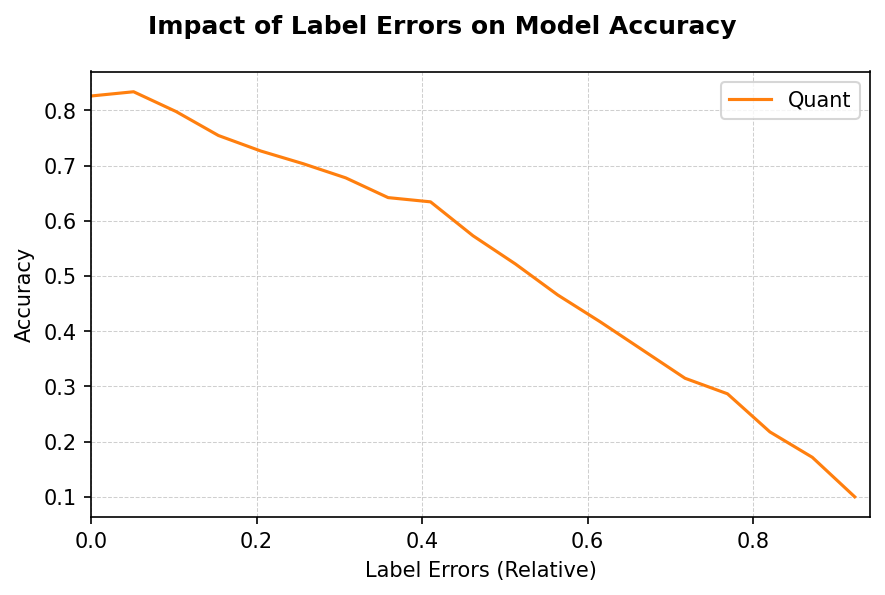

In [11]:
experimental_dict["experiment_1"][1].acc_decr()
#or use the function directly
#visualize_acc_decr(experimental_dict["experiment_1"][1].df_, first="relative", cl_="MR-Hydra")

In [ ]:
dfs_, clfs_, clfs_seed_ = get_frames_and_names(exp_dict = experimental_dict)

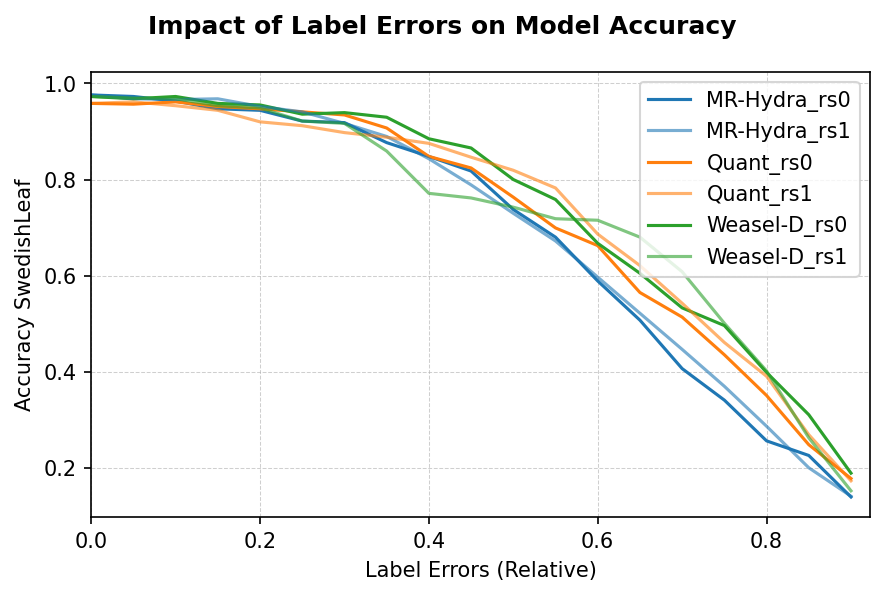

In [ ]:
visualize_acc_decr_multiple(multiple_df=dfs_, vis_names_=clfs_seed_, ds_="SwedishLeaf", filename_="acc_decr", save_fig=True, exp_folder=None)

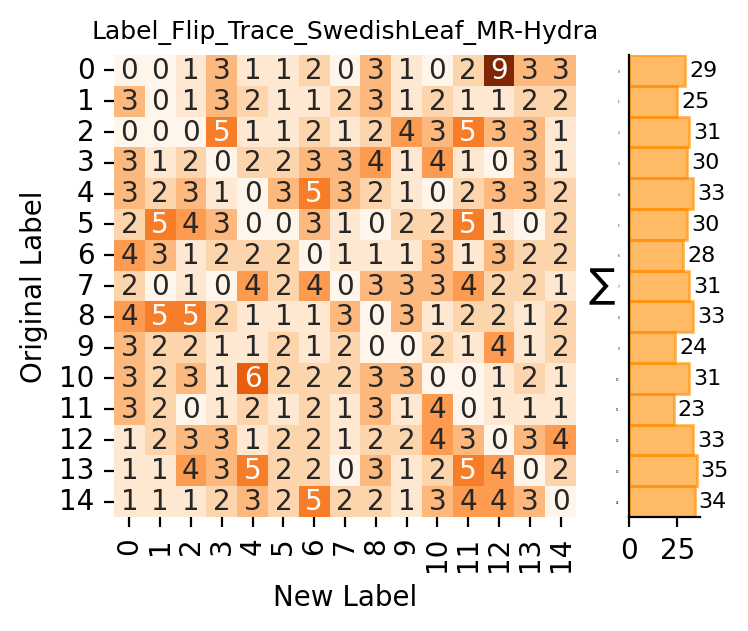

In [ ]:
experimental_dict["experiment_0"][1].trace_M()

In [ ]:
from pipeline_builder import run_single_pipeline
DATASET_NAME = "Beef"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
RANDOM_S = 0                            #Random Seed for everything except the DCA
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"random_seed":0,"start":0,"stop":26,"step":1}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True 
DATA_VIS  = False

experiment_args = [DATASET_NAME, CLASSIFIER_NAME, REDUCTION_F,RANDOM_S, DCA, DoE_PARAM, EXP_FOLD, SAVE_FILES]

results = run_single_pipeline(*experiment_args)

X_train             : (30, 1, 470)
y_train             : (30,)
X_test              : (30, 1, 470)
y_test              : (30,)
X_train_small       : (30, 1, 470)
y_train_small       : (30,)
X_test_small        : (30, 1, 470)
y_test_small        : (30,)
searching for ['Beef_res_0_0_26_1.csv'] in simulation_results/MR-Hydra/Beef
Potential Files in the current directory:  ['.DS_Store', 'Beef_res_0_0_26_1.csv', 'Beef_res_0_0_23_1.csv', 'Beef_res_0_0_18_1.csv', 'Beef_res_TEST.csv', 'Beef_res_0_0_16_2.csv', 'Beef_res_0_0_6_2.csv']
✅ Exact match found: Beef_res_0_0_26_1.csv
